In [ ]:
Logistic Regression (bank-full) Assignment

In [ ]:
Q)y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
# Load the data set
bank= pd.read_csv('C:/Users/aabdu/Desktop/Logistic Regression Assignments/bank-full - copy.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank['default']=bank['default'].map({'yes':1, 'no':0})

In [7]:
bank['housing']=bank['housing'].map({'yes':1, 'no':0})

In [8]:
bank['loan']=bank['loan'].map({'yes':1, 'no':0})

In [9]:
bank['y']=bank['y'].map({'yes':1, 'no':0})

In [10]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
Correlation Matrix with Heatmap

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
X= bank.iloc[:,:10]
Y = bank.iloc[:,-1]

In [14]:
# Get correlations of each features in dataset
corr = bank.corr()
top_corr_features= corr.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

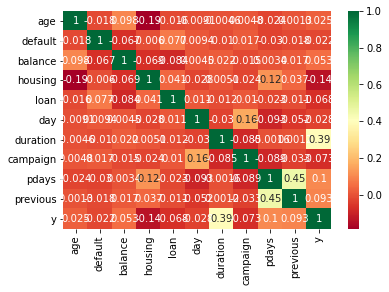

In [15]:
# Plot Heat map
g = sns.heatmap(bank[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [ ]:
Dropping the Features which are not strongly correlated.

In [16]:
bank.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


In [17]:
bank1= bank.copy()

In [18]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [19]:
bank1 = bank1.drop('job', axis=1)
bank1 = bank1.drop('education', axis=1)
bank1 = bank1.drop('marital', axis=1)
bank1 = bank1.drop('month', axis=1)
bank1 = bank1.drop('contact', axis=1)
bank1 = bank1.drop('poutcome', axis=1)

In [20]:
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1
45209,57,0,668,0,0,17,508,4,-1,0,0


In [21]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   default   45211 non-null  int64
 2   balance   45211 non-null  int64
 3   housing   45211 non-null  int64
 4   loan      45211 non-null  int64
 5   day       45211 non-null  int64
 6   duration  45211 non-null  int64
 7   campaign  45211 non-null  int64
 8   pdays     45211 non-null  int64
 9   previous  45211 non-null  int64
 10  y         45211 non-null  int64
dtypes: int64(11)
memory usage: 3.8 MB


In [22]:
bank1.shape

(45211, 11)

<AxesSubplot:xlabel='y', ylabel='age'>

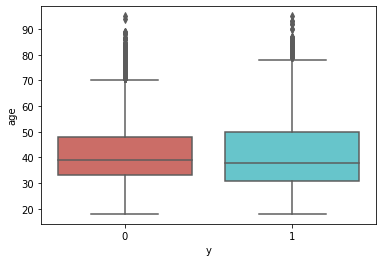

In [23]:
sn.boxplot(x='y', y='age',data=bank1,palette='hls')

<AxesSubplot:xlabel='y', ylabel='count'>

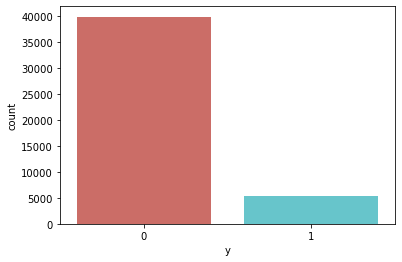

In [24]:
sn.countplot(x='y',data=bank1, palette='hls')

<AxesSubplot:xlabel='y'>

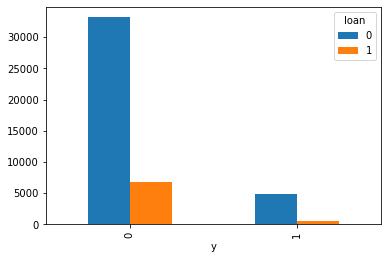

In [25]:
pd.crosstab(bank1.y,bank1.loan).plot(kind='bar')

<AxesSubplot:xlabel='y'>

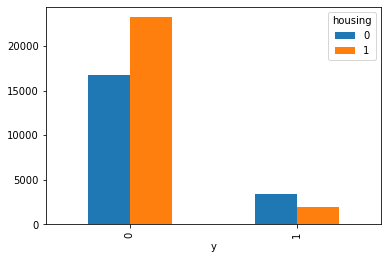

In [26]:
pd.crosstab(bank1.y,bank1.housing).plot(kind='bar')

In [ ]:
Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
bank1.shape

(45211, 11)

In [28]:
x= bank1.iloc[:,0:10]
y = bank1.iloc[:,10]

In [29]:
classifier= LogisticRegression(max_iter=170)
classifier.fit(x,y) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=170)

In [ ]:
# Coefficients of features

In [32]:
classifier.coef_

array([[-2.96185083e-02, -4.68273094e-02,  2.15497066e-05,
        -1.63926773e+00, -4.70734206e-01, -1.87291186e-02,
         3.69715621e-03, -1.86573934e-01,  2.78356871e-03,
         7.81619973e-02]])

In [34]:
classifier.predict_proba(x)

array([[0.96598074, 0.03401926],
       [0.96719443, 0.03280557],
       [0.97825955, 0.02174045],
       ...,
       [0.28180914, 0.71819086],
       [0.8292598 , 0.1707402 ],
       [0.43115236, 0.56884764]])

In [35]:
y_pred = classifier.predict(x)
bank1['y_pred'] = y_pred
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,y_pred
0,58,0,2143,1,0,5,261,1,-1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,1
45207,71,0,1729,0,0,17,456,2,-1,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,1
45209,57,0,668,0,0,17,508,4,-1,0,0,0


In [36]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
new_bank = pd.concat([bank1,y_prob],axis=1)
new_bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,y_pred,0,1
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0.965981,0.034019
1,44,0,29,1,0,5,151,1,-1,0,0,0,0.967194,0.032806
2,33,0,2,1,1,5,76,1,-1,0,0,0,0.978260,0.021740
3,47,0,1506,1,0,5,92,1,-1,0,0,0,0.974888,0.025112
4,33,0,1,0,0,5,198,1,-1,0,0,0,0.776532,0.223468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,1,0.372561,0.627439
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0.857085,0.142915
45208,72,0,5715,0,0,17,1127,5,184,3,1,1,0.281809,0.718191
45209,57,0,668,0,0,17,508,4,-1,0,0,0,0.829260,0.170740


In [37]:
new_bank['y_pred'].value_counts()

0    43286
1     1925
Name: y_pred, dtype: int64

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39079   843]
 [ 4207  1082]]


In [39]:
pd.crosstab(y_pred,y)

y,0,1
row_0,,
0,39079,4207
1,843,1082


In [40]:
((39084+1078)/(39084+4211+1078+838))

0.8883236380526863

In [41]:
accuracy= sum(y==y_pred)/bank.shape[0]
accuracy

0.8883015195417044

In [42]:
from sklearn.metrics import classification_report
print (classification_report (y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.20      0.30      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211

